In [1]:
import pandas as pd 
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [19]:
df = pd.read_excel(r'C:\Users\25372\Desktop\data2.xlsx')
df['ds']=pd.to_datetime(df['ds'])
df['cap']=3500
# model=Prophet()
model=Prophet(
    growth='logistic',
    seasonality_mode='additive',
    daily_seasonality = True,
    weekly_seasonality=3
                            )#logistic linear
model.fit(df) 
future = model.make_future_dataframe(periods=16, freq='w')
future['cap']=3500
future['floor']=0
forecast = model.predict(future)

In [20]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(8)

,ds,yhat,yhat_lower,yhat_upper
1214,2023-02-19,1746.095204,1595.358686,1908.469113
1215,2023-02-26,1724.765843,1588.262849,1861.190498
1216,2023-03-05,1698.331251,1549.114201,1842.313816
1217,2023-03-12,1668.993410,1531.962574,1815.399732
1218,2023-03-19,1647.234211,1490.141590,1785.068986
1219,2023-03-26,1644.695832,1501.588837,1805.927669
1220,2023-04-02,1662.595974,1509.886476,1818.335079
1221,2023-04-09,1688.166133,1531.980124,1834.593407


In [21]:
# type(forecast)

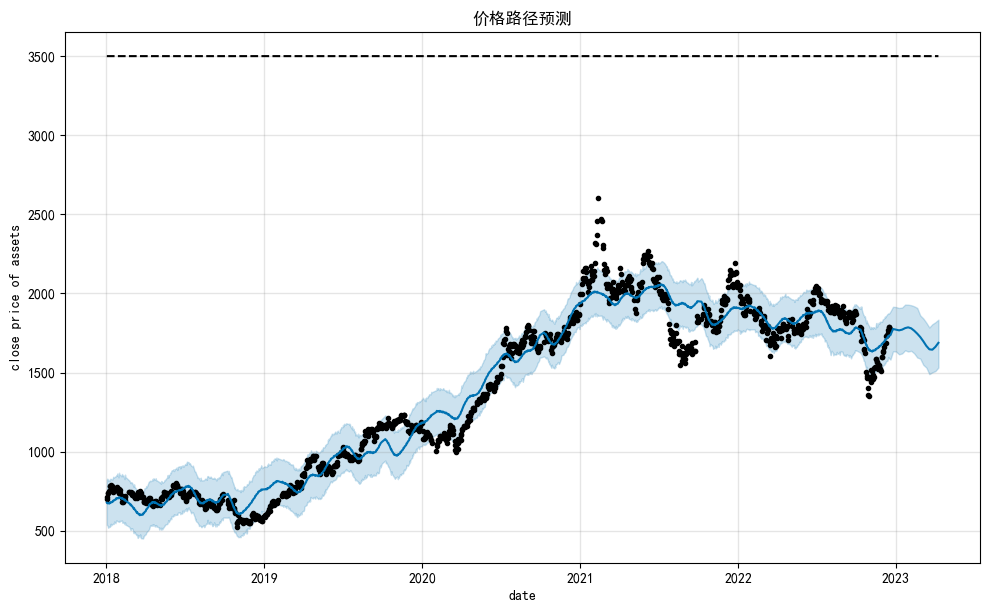

In [22]:
model.plot(forecast)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.title('价格路径预测')
plt.xlabel('date')
plt.ylabel('close price of assets')
plt.show()

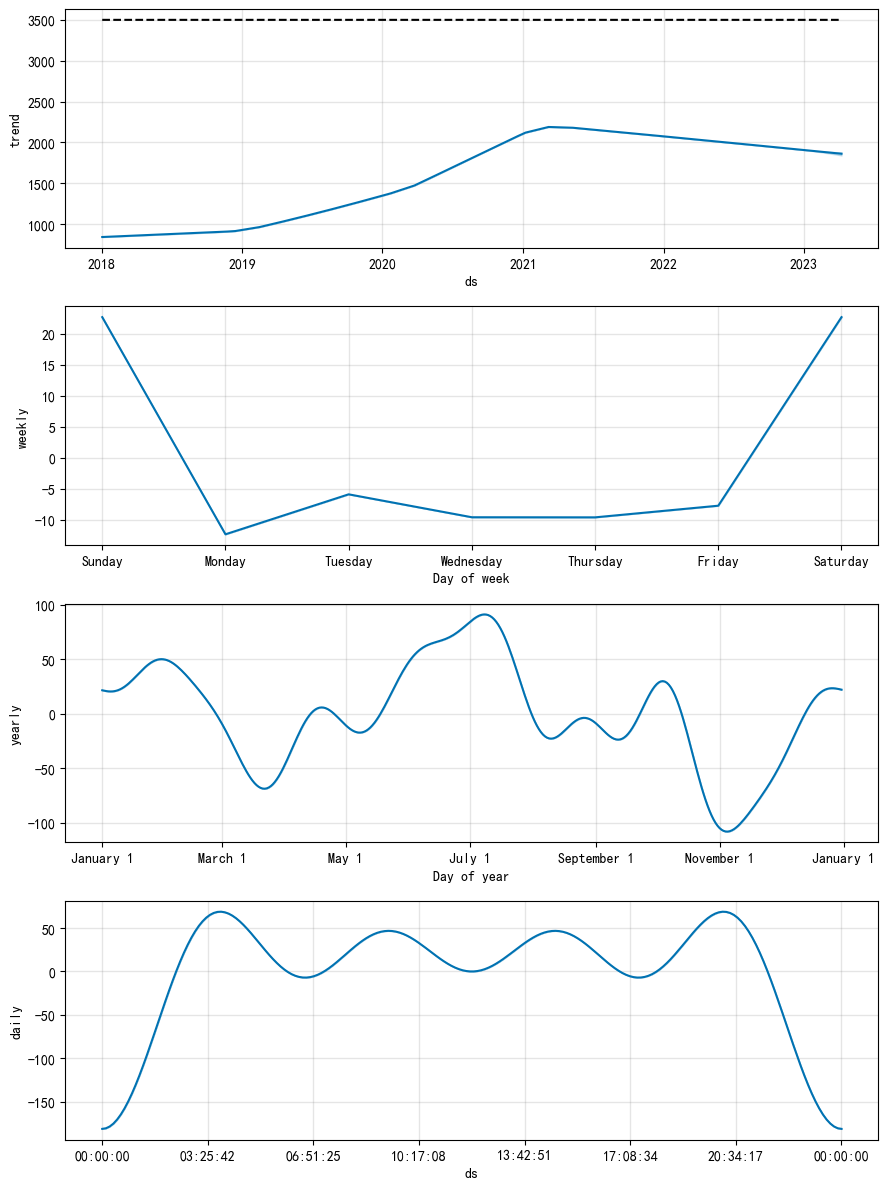

In [23]:
model.plot_components(forecast)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.show()